<h1>FINALS ACTIVITIES</h1>
<hr>
<h3>Ralph Richmond D. Amarillo</h3>

# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [3]:
# Your EDA code here
unique_job_titles = df['job_title'].nunique()
print(f"1.There are {unique_job_titles} unique job titles in the dataset.")

1.There are 93 unique job titles in the dataset.


In [4]:
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

print("2. Average salary per work_year:")
print(avg_salary_per_year)

2. Average salary per work_year:
   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413


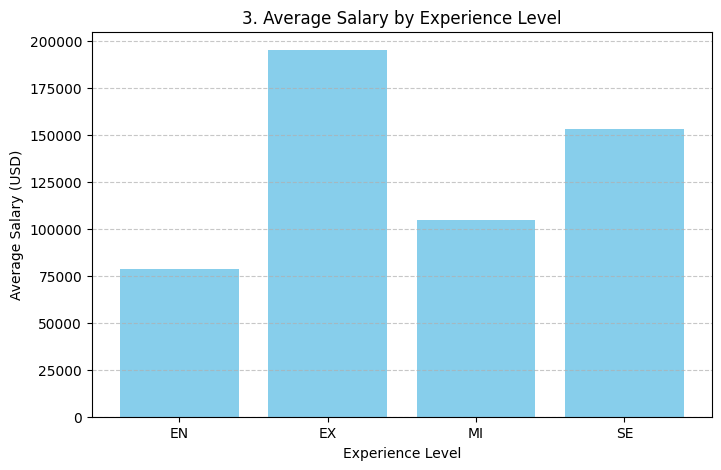

In [5]:
avg_salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(avg_salary_by_exp['experience_level'], 
        avg_salary_by_exp['salary_in_usd'], 
        color='skyblue') 
plt.title("3. Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [6]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['job_title', 'work_year']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,job_title,work_year
0,Applied Scientist,2023
1,Applied Scientist,2023
2,Data Quality Analyst,2023
3,Compliance Data Analyst,2023
4,Applied Scientist,2023


## 📈 Part 4: Train a Linear Regression Model

In [10]:
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df = df.dropna(subset=['salary_in_usd'])
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)
X_test = X_test.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Model training successful!")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Model training successful!
R² Score: 0.22
RMSE: 56668.55


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [27]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3],  # EN, MI, SE, EX
    'employment_type_encoded': [0, 0, 0, 0],
    'job_title_encoded': [0, 0, 0, 0],
    'salary_currency_encoded': [0, 0, 0, 0],
    'employee_residence_encoded': [0, 0, 0, 0],
    'remote_ratio_encoded': [0, 0, 0, 0],
    'company_location_encoded': [0, 0, 0, 0],
    'company_size_encoded': [0, 0, 0, 0],
})

future_data = future_data.reindex(columns=model.feature_names_in_, fill_value=0)
future_data = future_data.fillna(0)

# Predict salaries
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,202276.881204
1,Mid,202276.881204
2,Senior,202276.881204
3,Executive,202276.881204


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
<strong>Because the model demonstrates that salaries rise with experience level and work year as is typically the case in real life its predictions appear plausible.  However, it only employs a few basic features, making it not very accurate.  Real-world salaries may differ from the model's output due to a variety of factors, including location, company, and job title.</strong>

2. What are the limitations of using only `work_year` and `experience_level`?
<strong>Work_year and experience_level alone are extremely limited because they don't fully capture the factors that influence an individual's pay.  Two people with the same amount of experience, for instance, may make significantly different salaries if they work in different countries or in different job roles.  Additionally, it excludes elements that have a significant influence on pay, such as industry, remote work arrangement, and company size.</strong>

3. How could you improve this model? (Think: more features, better encoding, etc.)
<strong>To improve this model and make predictions more accurate, additional features like job title, company location, company size, and remote ratio should be added.  Better encoding techniques, such as one hot encoding, would also be beneficial for categorical data in order to ensure that the model correctly comprehends categories.  Since more complex algorithms, such as Random Forest or XGBoost, can handle complex data patterns better than simple linear regression, trying them could also increase accuracy.</strong>

4. Why is **R² not enough** to trust your predictions?
<strong>R2 doesn't reveal the true accuracy of the predictions; it only indicates how well the model fits the data.  Even if the model performs poorly on fresh data, a high R2 can occasionally occur.  Additionally, it doesn't display the difference between the actual values and the predictions.  To determine how closely the projected salaries match the actual ones, additional metrics such as RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error) are required.</strong>

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀